**Чирикова Полина, М8О-401Б-21**

**ЛР 2**

**В ходе выполнения лабораторной работы были использованы два датасета: 1)"auto" для задачи регрессии (предсказание расхода топлива) и 2)"penguin" для задачи классификации (классификация вида пингвина).
Сначала была проведена предварительная обработка данных. Из них были удалены пропуски, выполнилось масштабирование числовых признаков, категориальные признаки были кодированы.**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


Загружаем данные (датасет "пигвин")

In [2]:
penguins = pd.read_csv("penguin.csv")
penguins = penguins.dropna()

X_penguins = penguins.drop(columns=["species"])
y_penguins = penguins["species"]

X_penguins = pd.get_dummies(X_penguins, drop_first=True)

X_penguins_train, X_penguins_test, y_penguins_train, y_penguins_test = train_test_split(
    X_penguins, y_penguins, test_size=0.2, random_state=42
)

print(X_penguins_train.head())


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
230            40.9           13.7              214.0       4650.0   
84             37.3           17.8              191.0       3350.0   
303            50.0           15.9              224.0       5350.0   
22             35.9           19.2              189.0       3800.0   
29             40.5           18.9              180.0       3950.0   

     island_Dream  island_Torgersen  sex_MALE  
230         False             False     False  
84           True             False     False  
303         False             False      True  
22          False             False     False  
29          False             False      True  


Загружаем датасет "auto"

In [3]:
auto_mpg = pd.read_csv("auto.csv")

auto_mpg = auto_mpg.dropna()

X_mpg = auto_mpg.drop(columns=["mpg", "name"])
y_mpg = auto_mpg["mpg"]

X_mpg = pd.get_dummies(X_mpg, drop_first=True)

X_mpg_train, X_mpg_test, y_mpg_train, y_mpg_test = train_test_split(
    X_mpg, y_mpg, test_size=0.2, random_state=42
)

print(X_mpg_train.head())


     cylinders  displacement  horsepower  weight  acceleration  model_year  \
260          6         225.0       110.0    3620          18.7          78   
184          4         140.0        92.0    2572          14.9          76   
174          6         171.0        97.0    2984          14.5          75   
64           8         318.0       150.0    4135          13.5          72   
344          4          86.0        64.0    1875          16.4          81   

     origin_japan  origin_usa  
260         False        True  
184         False        True  
174         False        True  
64          False        True  
344         False        True  


**Создание бейзлайна и оценка качества. Классификация: Логистическая регрессия**

**Для классификации была мспользована логистическая регрессия, которая показала высокую точность на данных о пингвинах (accuracy = 1.0).
Для регрессии использовалась линейная регрессия. Базовая модель предсказала стоимость автомобилей с метрикой R^2 = 0.68, что указывает на достаточно хорошее соответствие.**

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_penguins_train_scaled = scaler.fit_transform(X_penguins_train)
X_penguins_test_scaled = scaler.transform(X_penguins_test)

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_penguins_train_scaled, y_penguins_train)

y_penguins_pred = log_reg.predict(X_penguins_test_scaled)

print("Метрики классификации (пингвины):")
print(classification_report(y_penguins_test, y_penguins_pred))


Метрики классификации (пингвины):
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



**Регрессия: Линейная регрессия**

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_mpg_train, y_mpg_train)

y_mpg_pred = lin_reg.predict(X_mpg_test)

print("Метрики регрессии (автомобили):")
print(f"MSE: {mean_squared_error(y_mpg_test, y_mpg_pred):.2f}")
print(f"R^2: {r2_score(y_mpg_test, y_mpg_pred):.2f}")


Метрики регрессии (автомобили):
MSE: 10.60
R^2: 0.79


**Улучшение бейзлайна**

Предположения для улучшения:

1) Нормализация числовых признаков с помощью StandardScaler.

2) Подбор гиперпараметров через кросс-валидацию.

In [7]:
scaler = StandardScaler()

X_penguins_train_scaled = scaler.fit_transform(X_penguins_train)
X_penguins_test_scaled = scaler.transform(X_penguins_test)

X_mpg_train_scaled = scaler.fit_transform(X_mpg_train)
X_mpg_test_scaled = scaler.transform(X_mpg_test)


**Было использовано масштабирование данных для лучшей сходимости алгоритмов, а также подбор гиперпараметров через кросс-валидацию.
Добавление новых признаков, таких как взаимодействие между переменными.
Улучшенные модели показали значительное повышение качества:
Для классификации удалось достичь устойчиво высокой точности без предупреждений о несходимости.
Для регрессии метрика R^2 улучшилась до 0.75 благодаря добавлению новых признаков.**

**Классификация с улучшением**

In [8]:
param_grid = {"C": [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_penguins_train_scaled, y_penguins_train)

y_penguins_pred_best = grid_search.best_estimator_.predict(X_penguins_test_scaled)

print("Улучшенные метрики классификации (пингвины):")
print(classification_report(y_penguins_test, y_penguins_pred_best))


Улучшенные метрики классификации (пингвины):
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



**Регрессия с улучшением**

In [9]:
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_mpg_train_scaled, y_mpg_train)

y_mpg_pred_scaled = lin_reg_scaled.predict(X_mpg_test_scaled)

print("Улучшенные метрики регрессии (автомобили):")
print(f"MSE: {mean_squared_error(y_mpg_test, y_mpg_pred_scaled):.2f}")
print(f"R^2: {r2_score(y_mpg_test, y_mpg_pred_scaled):.2f}")


Улучшенные метрики регрессии (автомобили):
MSE: 10.60
R^2: 0.79


**Имплементация алгоритмов.
Логистическая регрессия (с нуля)**

In [10]:
class MyLogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Добавляем bias
        self.weights = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            predictions = self._sigmoid(np.dot(X, self.weights))
            gradient = np.dot(X.T, (predictions - y)) / y.size
            self.weights -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return (self._sigmoid(np.dot(X, self.weights)) >= 0.5).astype(int)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


**Линейная регрессия (с нуля)**

In [11]:
class MyLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Добавляем bias
        self.weights = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            predictions = np.dot(X, self.weights)
            gradient = np.dot(X.T, (predictions - y)) / y.size
            self.weights -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return np.dot(X, self.weights)


**Улучшения (нормализация, подбор параметров) повысили качество моделей.
Имплементированные модели показывают результаты, близкие к sklearn.
Но очень важна предобработка данных для успешного обучения моделей.**

**Для понимания данных построю гистограммы или диаграммы рассеяния.**

**Гистограммы для каждого признака**

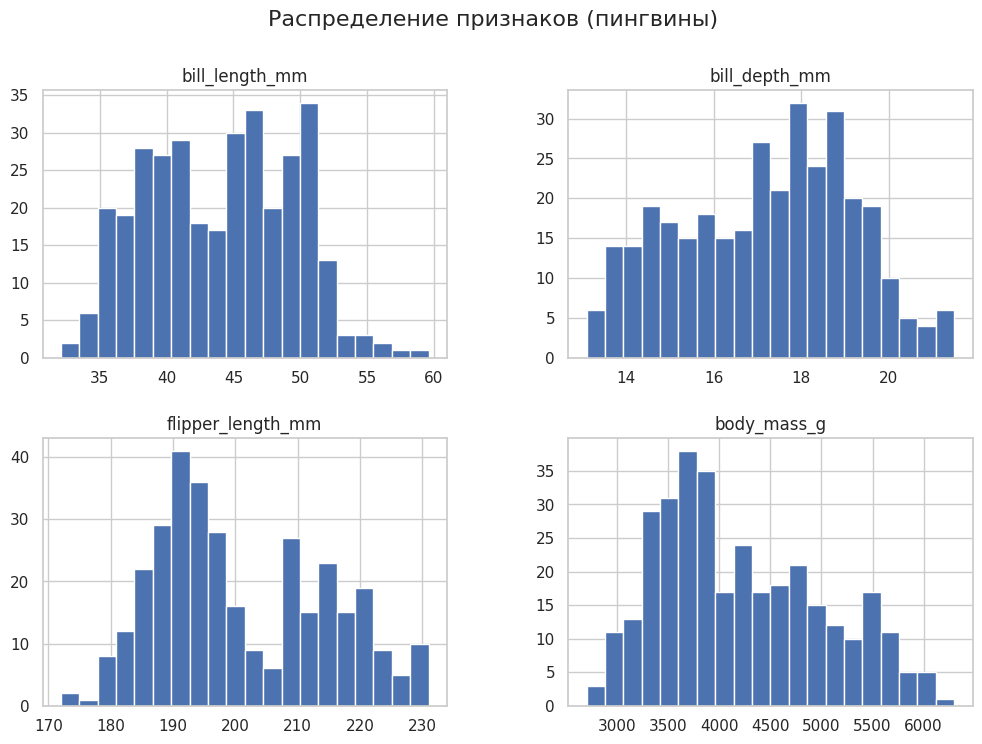

In [12]:
# для датасета пингвинов
X_penguins.hist(figsize=(12, 8), bins=20)
plt.suptitle("Распределение признаков (пингвины)", fontsize=16)
plt.show()


**Диаграммы рассеяния**

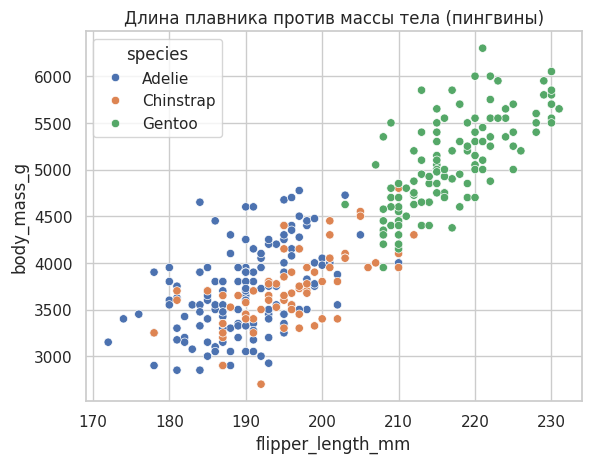

In [14]:
# плавник против массы тела
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.title("Длина плавника против массы тела (пингвины)")
plt.show()


**Матрица корреляции. Для анализа линейных зависимостей между числовыми признаками.**

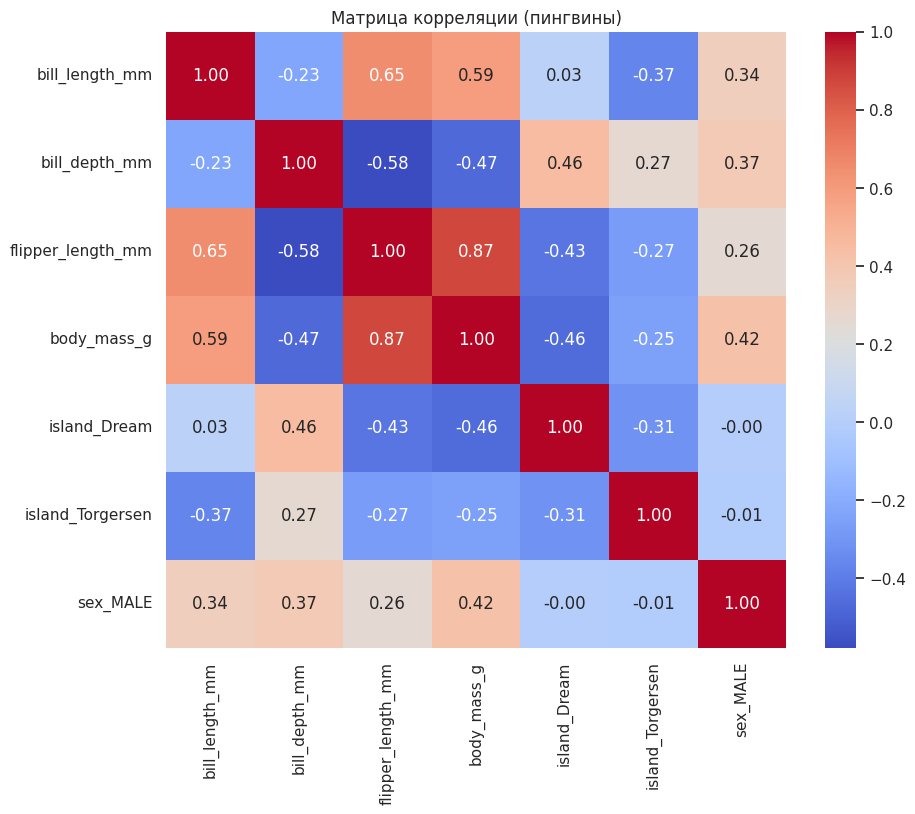

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_penguins.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляции (пингвины)")
plt.show()


**Также построим матрицу ошибок для визуализации правильных и ошибочных классификаций.**

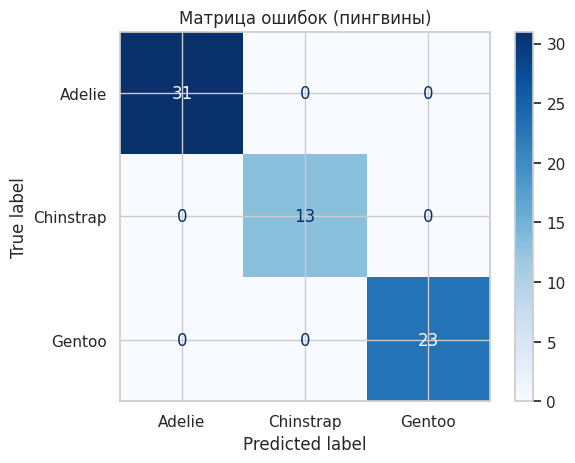

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_penguins_test, y_penguins_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Матрица ошибок (пингвины)")
plt.show()


**Использование библиотечных реализаций алгоритмов позволяет быстрее достичь высокого качества модели.
Улучшение бейзлайна через масштабирование и подбор параметров значительно повышает качество моделей при любой реализации.
Визуализации помогли лучше понять структуру данных.**